In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PRED_RES_FILE = "predict_results.json"

In [6]:
df_all = pd.read_json(PRED_RES_FILE)

In [7]:
df_all

,avg_rmse,data_file,error_types,hidden_size,model_name,model_timestamp,process_dim,std_rmse,var_mse
0,5.692734,../data/simulated/hawkes_synthetic_exp_2d_2018...,0.503,128,HawkesLSTM,20181209-132611,2,0.323021,7355.487309
1,5.217717,../data/simulated/hawkes_synthetic_exp_2d_2018...,0.526,128,HawkesDecayRNN,20181209-132014,2,0.216779,4524.364530


In [41]:
df_ = df_all[df_all.process_dim == 2]

In [42]:
labels = df_.model_name.values

In [43]:
means = df_.avg_rmse.values

In [44]:
stds = df_.std_rmse.values

In [45]:
yerr = 3*stds

In [51]:
error_types = df_.error_types.values

Text(0, 0.5, 'Précision, prédiction du type $k$')

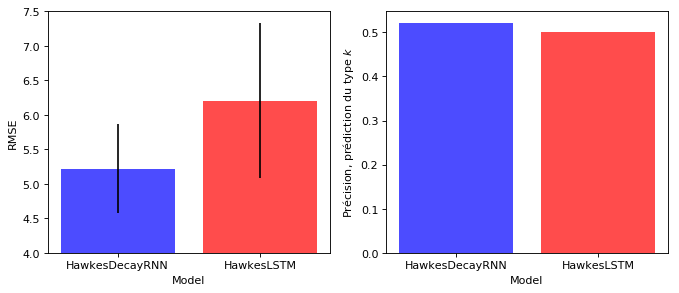

In [54]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4), dpi=80)
ax0.bar(range(len(means)), means, alpha=0.7,
        yerr=yerr, color=['blue', 'red'])
ax0.set_xlabel("Model")
ax0.set_xticks(range(len(means)))
ax0.set_xticklabels(labels)
ax0.set_ylabel("RMSE")
ax0.set_ylim((4, 7.5))

ax1.bar(range(len(means)), error_types, alpha=0.7,
        color=['blue', 'red'])
ax1.set_xlabel("Model")
ax1.set_xticks(range(len(means)))
ax1.set_xticklabels(labels)
ax1.set_ylabel("Précision, prédiction du type $k$")

In [56]:
fig.savefig('../results/2D_Hawkes_Data_RMSE.pdf')